## Getting Amarstock Price Data.


In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from utils import *


In [2]:
datadir = "/root/codespace/quant-finance-lectures/amarstock_adjusted_data/daily"

In [3]:
print(get_top20_stocks(path=datadir))

[('00DS30', 3084026774000.0), ('00DSES', 2132060774800.0), ('00DSEX', 3370925421616.0), ('1JANATAMF', 233585572.0), ('1STPRIMFMF', 332978314.0), ('AAMRANET', 148017730.0), ('AAMRATECH', 683394625.0), ('ABB1STMF', 256367920.0), ('ABBANK', 769581974.0), ('ACFL', 104802917.0), ('ACI', 94419722.0), ('ACIFORMULA', 126512844.0), ('ACMELAB', 53292422.0), ('ACTIVEFINE', 848206734.0), ('ADNTEL', 51799485.0), ('ADVENT', 237026778.0), ('AFCAGRO', 336544932.0), ('AFTABAUTO', 297630571.0), ('AGNISYSL', 567261957.0), ('AGRANINS', 25712648.0)]


In [4]:
print(get_stocknames(path=datadir)[:20])

['MATINSPINN', 'EBLNRBMF', 'APEXFOODS', 'AGRANINS', 'NPOLYMER', 'APEXSPINN', 'BXPHARMA', 'AMBEEPHA', 'SEMLFBSLGF', 'AIBL1STIMF', 'ICBAGRANI1', 'FAMILYTEX', 'WALTONHIL', 'FAREASTLIF', 'DSHGARME', 'SILVAPHL', 'NAVANACNG', 'EBL', 'PRIMELIFE', '00DSEX']


In [5]:
### Getting prices
stockname = 'MATINSPINN'
df = get_prices(stockname, path=datadir) 
df.head(2)   
    

,open,high,low,close,volume
timestamp,,,,,
2012-01-01 00:00:00+00:00,45.0,50.0,41.6,41.9,0.0
2012-01-02 00:00:00+00:00,45.0,50.0,41.6,41.9,0.0


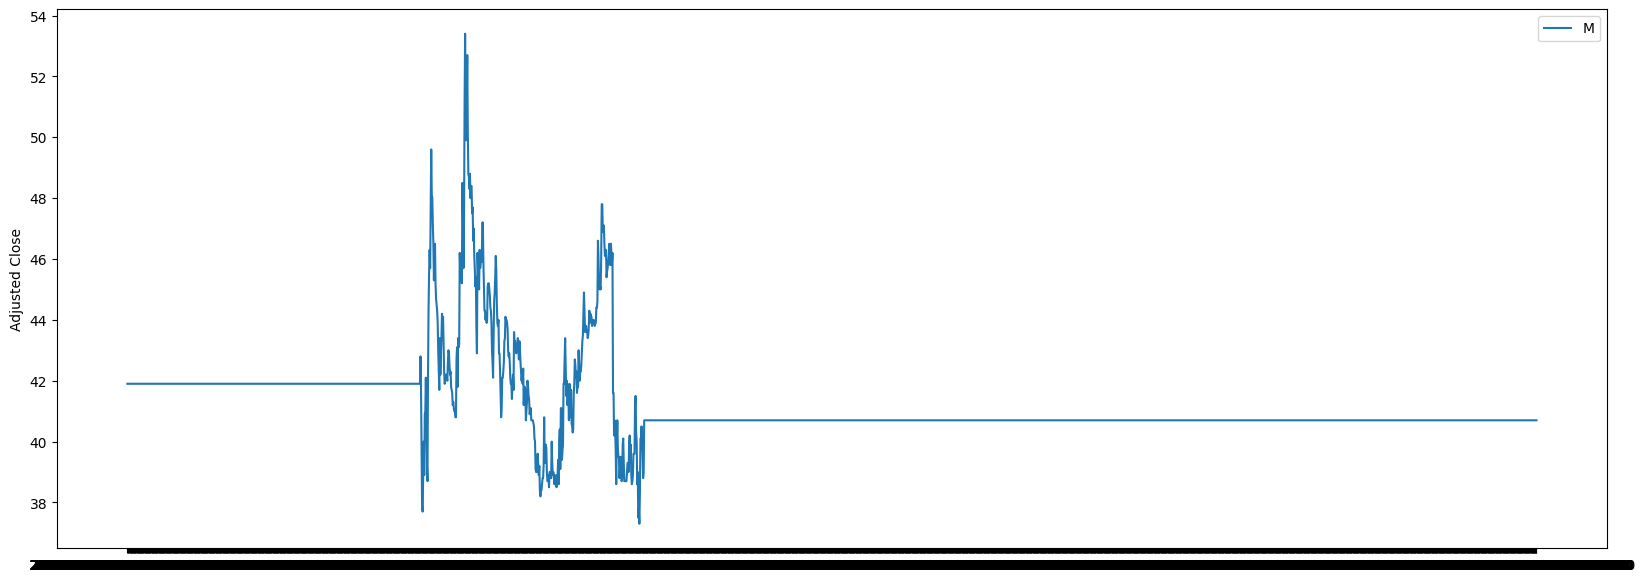

In [6]:
fig_plotter(index=df.close.index, values=df.close.values, xlabel="Dates", ylabel='Adjusted Close', stockname=stockname)

In [7]:
print(f'Mean of adjusted close is {df.close.values.mean()}')
print(f'Std of adjusted close is {df.close.values.std()}')

Mean of adjusted close is 41.248264021365884
Std of adjusted close is 1.3803306508113657


In [8]:
### Getting returns.
print(get_returns(dataframe=df, field='close')[800:900])

timestamp
2015-05-06 00:00:00+00:00    0.012853
2015-05-07 00:00:00+00:00   -0.020305
2015-05-10 00:00:00+00:00    0.036269
2015-05-11 00:00:00+00:00    0.010000
2015-05-12 00:00:00+00:00   -0.032178
                               ...   
2015-09-29 00:00:00+00:00    0.008677
2015-09-30 00:00:00+00:00   -0.004301
2015-10-01 00:00:00+00:00   -0.010799
2015-10-04 00:00:00+00:00    0.015284
2015-10-05 00:00:00+00:00   -0.006452
Name: close, Length: 100, dtype: float64


In [9]:
print(get_returns(dataframe=df, field='all')[800:900])

                               open      high       low     close    volume
timestamp                                                                  
2015-05-06 00:00:00+00:00  0.012987  0.015385  0.015625  0.012853  1.321649
2015-05-07 00:00:00+00:00  0.002564 -0.002525 -0.015385 -0.020305 -0.096388
2015-05-10 00:00:00+00:00  0.010230  0.022785  0.015625  0.036269  0.057529
2015-05-11 00:00:00+00:00  0.035443  0.027228  0.015385  0.010000 -0.058835
2015-05-12 00:00:00+00:00 -0.046455 -0.043373 -0.025253 -0.032178 -0.554771
...                             ...       ...       ...       ...       ...
2015-09-29 00:00:00+00:00 -0.004348  0.010823 -0.002179  0.008677  3.378997
2015-09-30 00:00:00+00:00  0.013100 -0.004283  0.002183 -0.004301 -0.325427
2015-10-01 00:00:00+00:00  0.000000 -0.002151 -0.004357 -0.010799 -0.348744
2015-10-04 00:00:00+00:00 -0.012931  0.015086 -0.002188  0.015284  2.949557
2015-10-05 00:00:00+00:00  0.024017 -0.004246  0.002193 -0.006452 -0.216843

[100 rows x

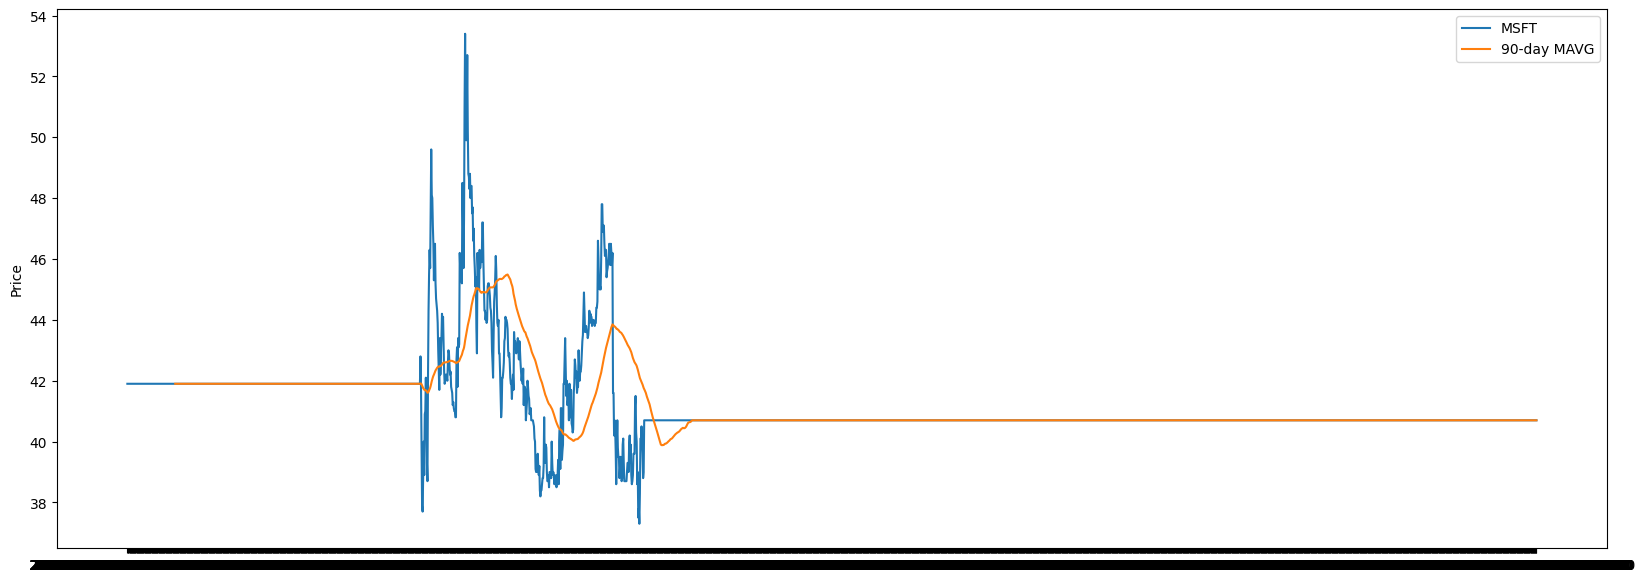

In [19]:
# Take the average of the last 60 days at each timepoint.
mavg = df.close.rolling(window=90).mean()
plt.figure(figsize=(20,7))
plt.plot(df.close.index, df.close.values)
plt.plot(mavg.index, mavg.values)
plt.ylabel('Price')
plt.legend(['MSFT', '90-day MAVG'])
plt.show()